# 1 Day : play with data

## 1.1 文件说明：

- ratings.csv : userId, movieId, rating, timestamp | 508MB
- tags.csv : userId, movieId, tag, timestamp | 15.8MB
- movies.csv : movieId, title, genres | 1.33MB
- links.csv : movieId, imdbId, tmdbId | 556KB
- genome-scores.csv : movieId, tagId, relevance | 308MB
- genome-tags.csv : tagId, tag | 17.6KB

## 1.2 导入常用库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1.3 读入文件

- 查看各个文件的user数量，movie数量，数据缺失值等情况
- 统计评论的时间分布，按天进行累加
- 对于links.csv, genome-scores.csv, genome-tag.csv 暂时先不管

In [2]:
path = '../ml-20m/'
ratings = pd.read_csv(path + "ratings.csv")
tags = pd.read_csv(path + "tags.csv")
movies = pd.read_csv(path + "movies.csv")

### 1.3.1 分析 ratings 的情况

In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [4]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
userId       int64
movieId      int64
rating       float64
timestamp    int64
dtypes: float64(1), int64(3)
memory usage: 610.4 MB


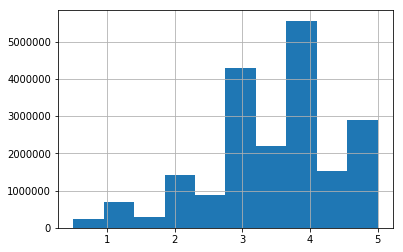

In [5]:
ratings.rating.hist()

In [6]:
print("用户的总数量 : ", ratings.userId.nunique())
print("电影的总数量 : ", ratings.movieId.nunique())

用户的总数量 :  138493
电影的总数量 :  26744


readme.txt 中说明有 138493 个用户，但是有 27278 部电影，说明有 534 部电影，没有评分

In [7]:
# 将时间搓转化为真实的时间
ratings['time'] = pd.to_datetime(ratings.timestamp, unit='s')

In [8]:
ratings.head()

,userId,movieId,rating,timestamp,time
0,1,2,3.5,1112486027,2005-04-02 23:53:47
1,1,29,3.5,1112484676,2005-04-02 23:31:16
2,1,32,3.5,1112484819,2005-04-02 23:33:39
3,1,47,3.5,1112484727,2005-04-02 23:32:07
4,1,50,3.5,1112484580,2005-04-02 23:29:40


In [9]:
ratings[ratings.userId == 1].sort_values(by = ['time'])

,userId,movieId,rating,timestamp,time
20,1,924,3.5,1094785598,2004-09-10 03:06:38
19,1,919,3.5,1094785621,2004-09-10 03:07:01
86,1,2683,3.5,1094785650,2004-09-10 03:07:30
61,1,1584,3.5,1094785656,2004-09-10 03:07:36
23,1,1079,4.0,1094785665,2004-09-10 03:07:45
18,1,653,3.0,1094785691,2004-09-10 03:08:11
96,1,2959,4.0,1094785698,2004-09-10 03:08:18
13,1,337,3.5,1094785709,2004-09-10 03:08:29
51,1,1304,3.0,1094785720,2004-09-10 03:08:40
111,1,3996,4.0,1094785727,2004-09-10 03:08:47


userId = 1 的用户 在2014-09-10 和 2015-04-02 两天一分钟评论近10部电影，总计评论了175部

下面查看一下，该用户是否对某一电影重复评论

In [10]:
ratings[ratings.userId == 1].movieId.nunique()

175

In [11]:
tmp = ratings.groupby(['userId']).movieId.nunique()
print('所用用户评论无重复电影数量 ： ', tmp.sum())
print('一个用户评论的最多的电影数量 ： ', tmp.max())
print('一个用户评论的最少的电影数量 ： ', tmp.min())

所用用户评论无重复电影数量 ：  20000263
一个用户评论的最多的电影数量 ：  9254
一个用户评论的最少的电影数量 ：  20


In [12]:
tmp.describe()

count    138493.000000
mean        144.413530
std         230.267257
min          20.000000
25%          35.000000
50%          68.000000
75%         155.000000
max        9254.000000
Name: movieId, dtype: float64

数据很好，说明没有用户对一个电影评论两次以上

同时说明 75% 以下的用户评论不超过 155 部电影

## 1.3.2 分析 tags 的情况

In [13]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [14]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465564 entries, 0 to 465563
Data columns (total 4 columns):
userId       465564 non-null int64
movieId      465564 non-null int64
tag          465548 non-null object
timestamp    465564 non-null int64
dtypes: int64(3), object(1)
memory usage: 14.2+ MB


In [15]:
# 将时间搓转化为真实的时间
tags['time'] = pd.to_datetime(tags.timestamp, unit='s')

In [16]:
print("用户的总数量 : ", tags.userId.nunique())
print("电影的总数量 : ", tags.movieId.nunique())

用户的总数量 :  7801
电影的总数量 :  19545


In [17]:
tags[tags.movieId == 4141].head()

,userId,movieId,tag,timestamp,time
0,18,4141,Mark Waters,1240597180,2009-04-24 18:19:40
218100,66193,4141,naive,1294446130,2011-01-08 00:22:10
232568,70201,4141,Mark Waters,1308333224,2011-06-17 17:53:44
311950,89274,4141,Freddie Prinze Jr.,1375164095,2013-07-30 06:01:35


不同的用户可能给同一个电影打上不同的标签

## 1.3.3 分析 movies 的情况

In [18]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [19]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
movieId    27278 non-null int64
title      27278 non-null object
genres     27278 non-null object
dtypes: int64(1), object(2)
memory usage: 639.4+ KB


- 查看评论数最多的TOP10电影
- 查看评分最高的TOP10电影
- 查看评论数最少的TOP10电影
- 查看评分数最少的TOP10电影

In [20]:
tmp = ratings.groupby(['movieId'])['rating'].count().reset_index().rename(columns={"rating": "rating_nums"}).sort_values(by='rating_nums', ascending=False).reset_index()

In [21]:
# 评论最多的TOP10电影
movies[movies.movieId.isin(tmp[:10]['movieId'].tolist())].merge(tmp, on=['movieId'], how='left').sort_values(by='rating_nums', ascending=False).reset_index()

,level_0,movieId,title,genres,index,rating_nums
0,2,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,293,67310
1,4,356,Forrest Gump (1994),Comedy|Drama|Romance|War,352,66172
2,3,318,"Shawshank Redemption, The (1994)",Crime|Drama,315,63366
3,8,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,587,63299
4,5,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,476,59715
5,1,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,257,54502
6,0,110,Braveheart (1995),Action|Drama|War,108,53769
7,7,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,583,52244
8,9,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,2486,51334
9,6,527,Schindler's List (1993),Drama|War,523,50054


In [22]:
# 评论最低的TOP10电影
# 评论最多的TOP10电影
movies[movies.movieId.isin(tmp[-10:]['movieId'].tolist())].merge(tmp, on=['movieId'], how='left').sort_values(by='rating_nums').reset_index()

,level_0,movieId,title,genres,index,rating_nums
0,0,78984,Guts (Agallas) (2009),Action|Crime,15481,1
1,1,110794,Out of the Blue (2002),Documentary,23140,1
2,2,110798,Ikigami (2008),Action|Drama|Mystery|Thriller,23142,1
3,3,110800,"Second Man, The (O Defteros Andras) (2013)",Drama,23143,1
4,4,110802,Family Tree (2012),Drama,23144,1
5,5,110805,"Glass Slipper, The (1955)",Musical|Romance,23145,1
6,6,110807,All About the Feathers (Por Las Plumas) (2013),Comedy,23146,1
7,7,110811,Dead in the Water (2002),Crime|Thriller,23148,1
8,8,110818,Which Way to the Front? (1970),Comedy|War,23150,1
9,9,131262,Innocence (2014),Adventure|Fantasy|Horror,26743,1


In [23]:
tmp = ratings.groupby(['movieId'])['rating'].mean().reset_index().rename(columns={"rating": "rating_mean"}).sort_values(by='rating_mean', ascending=False).reset_index()

In [24]:
# 评分最高的TOP10电影
movies[movies.movieId.isin(tmp[:10]['movieId'].tolist())].merge(tmp, on=['movieId'], how='left').sort_values(by='rating_mean', ascending=False).reset_index()

,level_0,movieId,title,genres,index,rating_mean
0,0,88488,"Summer Wishes, Winter Dreams (1973)",Drama,17556,5.0
1,1,89133,Boys (Drenge) (1977),Drama,17703,5.0
2,2,95517,"Barchester Chronicles, The (1982)",Drama,19152,5.0
3,3,105187,Linotype: The Film (2012),Documentary,21656,5.0
4,4,105191,Rocaterrania (2009),Documentary|Fantasy,21658,5.0
5,5,105526,Year Zero: The Silent Death of Cambodia (1979),Documentary,21762,5.0
6,6,105529,Stealing a Nation (2004),Documentary,21763,5.0
7,7,105841,B-Side (2013),Comedy|Romance,21840,5.0
8,8,105846,Only Daughter (2013),Drama,21842,5.0
9,9,126945,Small Roads (2011),(no genres listed),25936,5.0


## 1.5 play_with_data 总结

- 如果做 cf, 总需要 ratings.csv 文件即可。
- 如果基于内容的推荐，可能需要根据 movies, tags 提取电影特征，来做基于内容的推荐。人的特征就无法获取了。
- 下一步：针对不同的方法，划分不同的数据集(一般划分为训练集，验证集，测试集)